In [1]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/에이블스쿨/10/10.23~10.27 미프5/churn_data.csv')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
df = df.drop('customerID', axis = 1)

In [8]:
df['TotalCharges'].dtypes

dtype('O')

In [10]:
df['TotalCharges'] = df['TotalCharges'].replace ({' ':0})
df2 = df.copy()
df2['TotaclCharges'] = df['TotalCharges'].astype(float)
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotaclCharges
0,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No,29.85
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1889.50
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,1990.50
7039,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,7362.90
7040,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,346.45
7041,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,306.60


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7034 non-null   object 
 1   SeniorCitizen     7042 non-null   float64
 2   Partner           7043 non-null   object 
 3   Dependents        7041 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7040 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  3580 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7042 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7042 non-null   object 


In [12]:
df2['Churn'].value_counts()
df2['Churn'] = df2['Churn'].replace({'Yes':1, 'No':0})
df3 = df2.copy()

In [13]:
df4 = df3.drop(['DeviceProtection'], axis = 1)
df4.dropna(axis = 0, inplace = True)

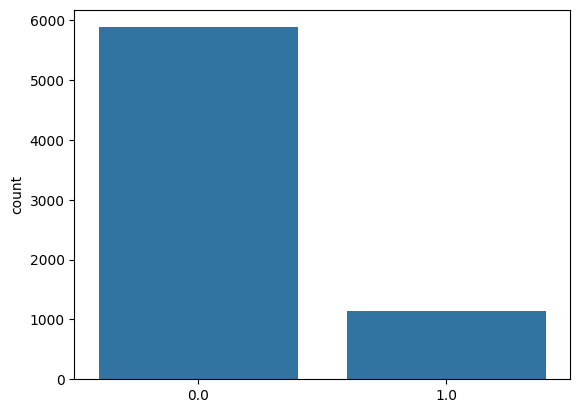

In [14]:
sns.barplot(x = df4['SeniorCitizen'].unique(), y = df4['SeniorCitizen'].value_counts())
plt.show()
df4.drop('SeniorCitizen', axis = 1, inplace = True)

<Axes: >

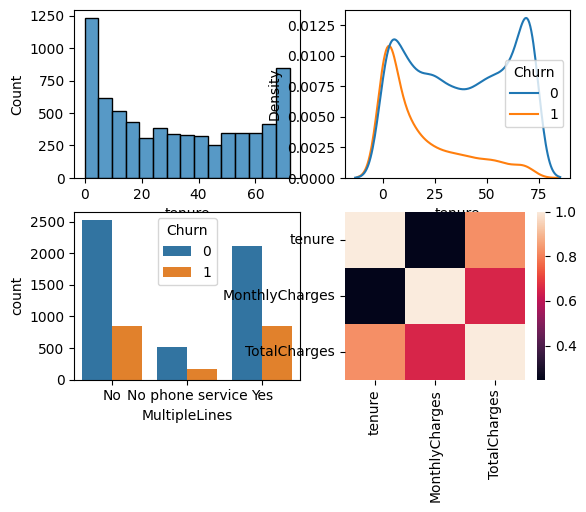

In [16]:
fig, ax = plt.subplots(ncols = 2, nrows = 2)
sns.histplot(x='tenure', data = df4, ax = ax[0,0])
sns.kdeplot(hue='Churn', x='tenure', data = df4, ax = ax[0,1])
sns.countplot(hue='Churn', x= 'MultipleLines', data = df4, ax = ax[1,0])
sns.heatmap(df3[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(),  ax = ax[1,1])

In [17]:
object_cols = np.where(df4.dtypes == 'object', df4.columns, 0).tolist()
while 0 in object_cols:
  object_cols.remove(0)

df5 = pd.get_dummies(df4, columns = object_cols, drop_first = True)
df5

,tenure,MonthlyCharges,Churn,TotaclCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
1,34,56.95,0,1889.50,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,53.85,1,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,45,42.30,0,1840.75,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2,70.70,1,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,8,99.65,1,820.50,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,72,21.15,0,1419.40,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7038,24,84.80,0,1990.50,True,True,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
7039,72,103.20,0,7362.90,False,True,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
7040,11,29.60,0,346.45,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
from sklearn.model_selection import train_test_split
target = 'Churn'
X = df5.drop(target, axis = 1)
y = df5[target]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, random_state = 42, stratify = y)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform (X_train)
X_valid = scaler.transform(X_valid)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 10, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 3, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

[[954  79]
 [304  69]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1033
           1       0.47      0.18      0.26       373

    accuracy                           0.73      1406
   macro avg       0.61      0.55      0.55      1406
weighted avg       0.68      0.73      0.68      1406



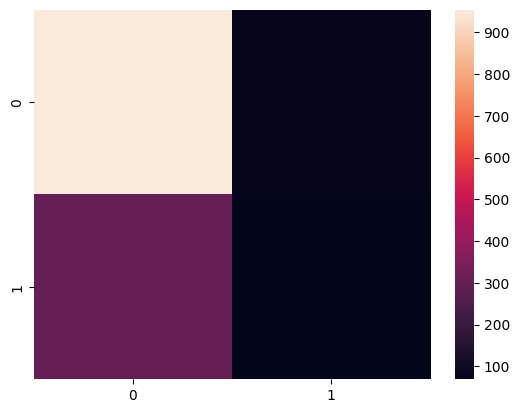

In [26]:
from sklearn.metrics import *
y_pred = model.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
print(cm)
sns.heatmap(cm)
print(classification_report(y_valid, y_pred))

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

In [29]:
X = Input(shape = X_train.shape[1])
print(X_train.shape)

(5621, 6543)


In [33]:
H = Dense(64, activation = 'relu')(X)
H = Dropout(0.2)(H)
Y = Dense(1, activation = 'sigmoid')(H)

model = Model(X,Y)
model.summary()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 30, batch_size = 16, validation_data =(X_valid, y_valid), verbose = 0)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6543)]            0         
                                                                 
 dense_1 (Dense)             (None, 64)                418816    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 418881 (1.60 MB)
Trainable params: 418881 (1.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylabe'

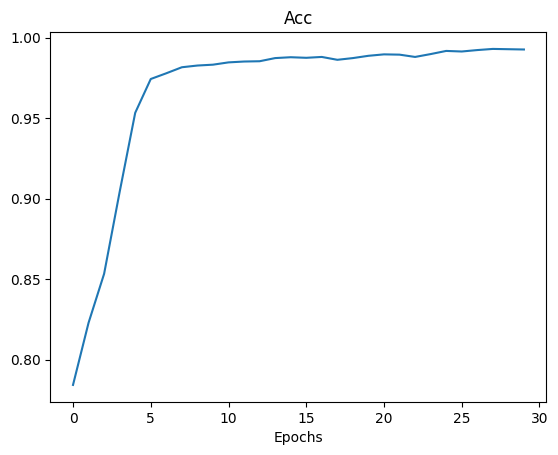

In [34]:
plt.title('Acc')
plt.plot(history.history['accuracy'], label = 'acc')
plt.xlabel('Epochs')
plt.ylabe('Acc')
plt.legend()
plt.show()